In [1]:
import pandas as pd
import numpy as np
#import yfinance as yf

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
#pd.__version__


In [2]:
df_header = pd.read_pickle(r'c:\Users\Zoli\Downloads\python\academy\df_allInfo_clean.pkl')
df_ts=pd.read_pickle(r'c:\Users\Zoli\Downloads\python\academy\50yr_timeSeries_data.pkl')

# df_header = pd.read_pickle(r'C:\Users\Safe\Documents\Data Science Course\_Project\df_allInfo_clean.pkl')
# df_ts=pd.read_pickle(r'C:\Users\Safe\Documents\Data Science Course\_Project\50yr_timeSeries_data.pkl')

In [3]:
df_ts.head()

TRGP                                  FDS                 ...  FE  \
           Open High Low Close Adj Close Volume Open High Low Close  ... Low   
Date                                                                 ...       
1962-01-02  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ... NaN   
1962-01-03  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ... NaN   
1962-01-04  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ... NaN   
1962-01-05  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ... NaN   
1962-01-08  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ... NaN   

                                  ODFL                                  
           Close Adj Close Volume Open High Low Close Adj Close Volume  
Date                                                                    
1962-01-02   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-03   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-04   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-05   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-08   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  

[5 rows x 3018 columns]

In [4]:
# original - which is not nice, warnings have been suppressed

import warnings
warnings.filterwarnings(action='ignore')


In [5]:

df_close         = df_ts.loc[: ,(slice(None) ,['Close'])].copy()
df_close.columns = df_close.columns.droplevel(1)

df_close['month'] = df_close.index.month
df_close['year']  = df_close.index.year

df_close.head()    

,TRGP,FDS,SYY,RCL,PSA,FISV,HUM,SNA,EMR,CAT,...,ADP,WMB,CCL,ATVI,DLTR,DLR,FE,ODFL,month,year
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.604167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1962
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.619792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1962
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.661458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1962
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.677083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1962
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.687500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1962


In [6]:
import pickle
import os

# # create alternate_port.pickle (from selectTickers)
# pickle_out = open('alternate_port.pickle' ,'wb')
# pickle.dump(alternate_port ,pickle_out)
# pickle_out.close()

# import alternate_port.pickle
pickle_in = open(r'C:\Users\Zoli\Downloads\python\academy\alternate_port.pkl' ,'rb')
alternate_port = pickle.load(pickle_in)


In [7]:
i = 5

df = df_close[alternate_port[f'cluster_{i}'].index.values.tolist()].copy()
df = df.dropna()
df.head()

,CME,MKTX,EXR,AVGO,PSA,SBAC,ESS,AMT,MA,V,...,FRC,COF,STT,JPM,MTB,SBNY,NTRS,USB,SIVB,BRK-B
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-19,155.220001,316.130005,86.699997,194.449997,187.600006,245.139999,209.070007,209.000000,227.149994,152.250000,...,90.059998,46.259998,46.630001,85.300003,104.839996,92.660004,67.410004,33.209999,168.169998,174.679993
2020-03-20,158.410004,310.630005,79.720001,192.220001,171.220001,229.330002,196.330002,195.389999,211.419998,146.830002,...,79.570000,45.009998,46.669998,83.500000,98.760002,80.650002,64.559998,32.570000,150.639999,170.059998
2020-03-23,139.539993,281.309998,74.610001,193.470001,160.610001,215.460007,182.229996,179.089996,203.300003,135.740005,...,75.599998,42.869999,43.209999,79.029999,88.099998,73.080002,63.110001,28.930000,143.210007,162.130005
2020-03-24,152.259995,326.720001,78.320000,212.759995,168.649994,242.240005,188.009995,190.270004,237.070007,154.529999,...,82.790001,50.910000,48.570000,88.430000,98.769997,78.900002,69.860001,31.200001,158.369995,178.199997
2020-03-25,156.330002,330.309998,83.040001,217.550003,176.539993,243.139999,200.770004,199.259995,256.480011,161.779999,...,84.449997,52.340000,49.380001,91.730003,105.000000,83.230003,72.860001,32.029999,165.000000,180.470001


In [8]:
# Create Portfolio using stock weighting
# Question: How to determine the weighting of each stock in the portfolio?

dummy_weight = np.array([1/df.shape[1] for x in range(df.shape[1])])

ticker_weight = dummy_weight # STILL NEED TO DO WEIGHTINGS

df_port = pd.Series(df.values.dot(ticker_weight) ,index=df.index)
df_port

Date
2020-03-19    139.107584
2020-03-20    130.970042
2020-03-23    126.072660
2020-03-24    139.641505
2020-03-25    144.155162
                 ...    
2022-12-05    253.632823
2022-12-06    250.627751
2022-12-07    251.021388
2022-12-08    253.055022
2022-12-09    251.054162
Length: 689, dtype: float64

In [ ]:
#################################
# NOTHING HAS BEEN DONE TO ANY CODE FURTHER BELOW
#################################

In [ ]:
# from sklearn import preprocessing

# df_scaled = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df) ,columns=df.columns ,index=df.index)
# df_scaled

# # nba[nba.columns] = pd.DataFrame(scaler.transform(nba), index=nba.index)

In [9]:
#--- NO log transformation -- differnece compared to v4
df=df_close.copy()


In [10]:
# time series analysis
#df_ts=df['BLK']
df_ts=df_port.copy()
df_ts=df_ts.dropna()
df_ts.head()

Date
2020-03-19    139.107584
2020-03-20    130.970042
2020-03-23    126.072660
2020-03-24    139.641505
2020-03-25    144.155162
dtype: float64

In [11]:
df_ts.index


DatetimeIndex(['2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-30',
               '2020-03-31', '2020-04-01',
               ...
               '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
               '2022-12-02', '2022-12-05', '2022-12-06', '2022-12-07',
               '2022-12-08', '2022-12-09'],
              dtype='datetime64[ns]', name='Date', length=689, freq=None)

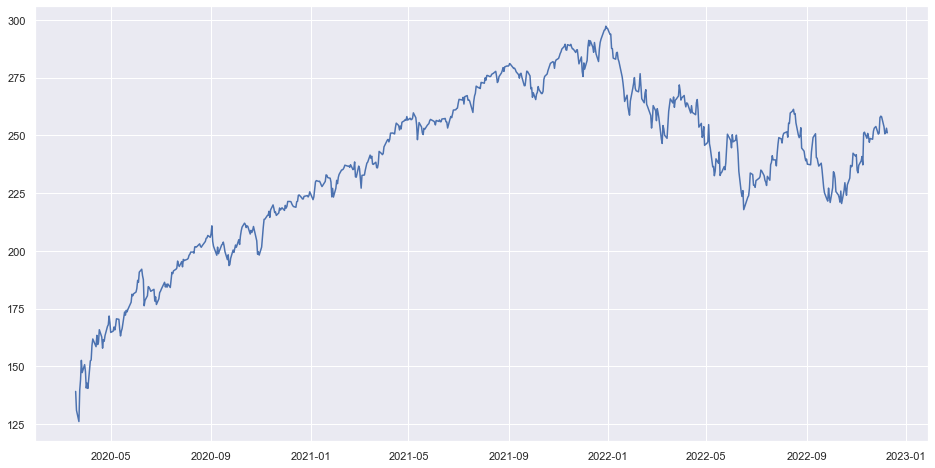

In [12]:
plt.figure(figsize=(16,8))
plt.plot(df_ts);


In [13]:
# based on monthly data

df_ts_monthly=df_ts.resample('1W').mean() ## was 1M
df_ts_monthly.head()



Date
2020-03-22    135.038813
2020-03-29    141.935830
2020-04-05    144.421070
2020-04-12    156.460264
2020-04-19    161.502104
Freq: W-SUN, dtype: float64

In [14]:
# v 006
pred_period = 3*4 ## was 12+12+12 in case on 1M # const for predition months

print(df_ts_monthly.shape)
df_ts_monthly_save=df_ts_monthly.copy() # needed to compare forecast with realized yield
df_ts_monthly = df_ts_monthly.head(143-pred_period) # till 2020.02.29, i.e. exclide covid drop and increase


(143,)


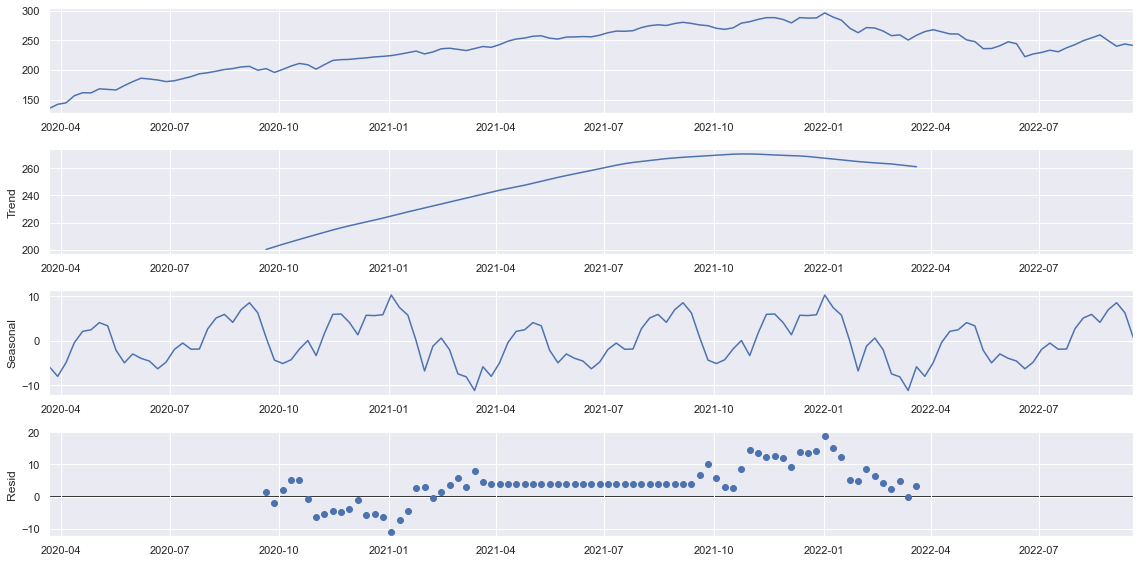

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
tsa =seasonal_decompose(df_ts_monthly)
fig=tsa.plot()
fig.set_size_inches((16, 8))
fig.tight_layout()

plt.show();

In [ ]:
## probably 3 month cycle

p-value: 0.005619074849580616


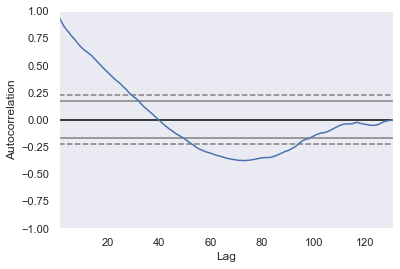

In [16]:
import statsmodels.api as sm

df_ts_monthly_log = np.log(df_ts_monthly) #Log transform


pd.plotting.autocorrelation_plot(df_ts_monthly_log);
res=sm.tsa.stattools.adfuller(df_ts_monthly_log)
print ("p-value:",res[1])

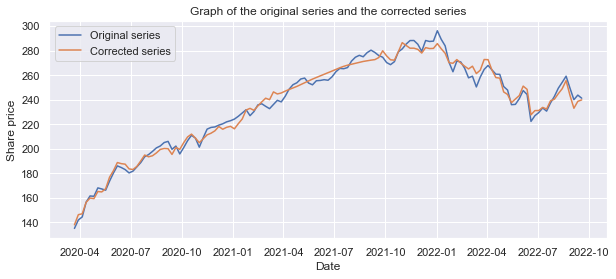

In [17]:
# v006 basic decomp

#plt.plot(df_ts_monthly_log);
tsa =seasonal_decompose(df_ts_monthly_log)

cvs=df_ts_monthly_log- tsa.seasonal

# We go to the exponential to find the original series
x_cvs=np.exp(cvs)

# We display the series
plt.figure(figsize= (10,4))

plt.plot(df_ts_monthly, label='Original series')
plt.plot(x_cvs, label='Corrected series') 

plt.title('Graph of the original series and the corrected series')
plt.xlabel('Date')
plt.ylabel('Share price')
plt.legend();

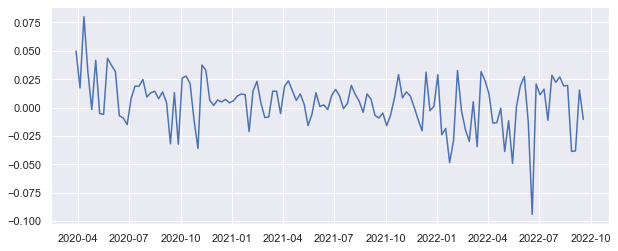

p-value: 4.453159939893491e-16


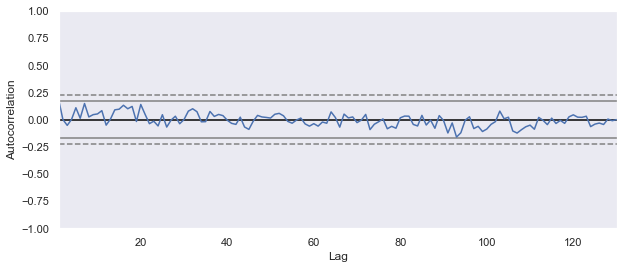

In [18]:
df_ts_monthly_log_1 = df_ts_monthly_log.diff().dropna()

plt.figure(figsize= (10,4))
plt.plot(df_ts_monthly_log_1);
plt.show();

plt.figure(figsize= (10,4))
pd.plotting.autocorrelation_plot(df_ts_monthly_log_1);
res=sm.tsa.stattools.adfuller(df_ts_monthly_log_1)
print ("p-value:",res[1])


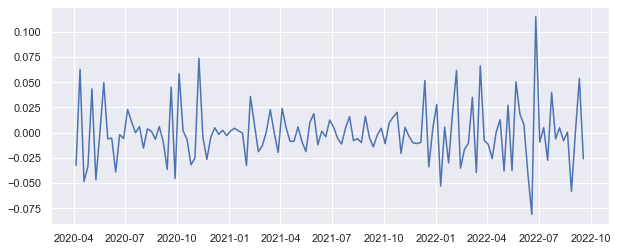

p-value: 1.93192125801251e-05


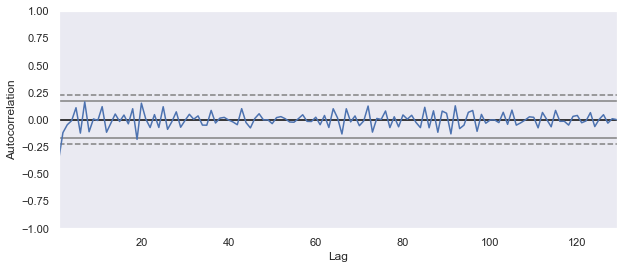

In [19]:
df_ts_monthly_log_2 = df_ts_monthly_log_1.diff().dropna()

plt.figure(figsize= (10,4))
plt.plot(df_ts_monthly_log_2);
plt.show();

plt.figure(figsize= (10,4))
pd.plotting.autocorrelation_plot(df_ts_monthly_log_2);
res=sm.tsa.stattools.adfuller(df_ts_monthly_log_2)
print ("p-value:",res[1])


In [20]:
######################## sarima

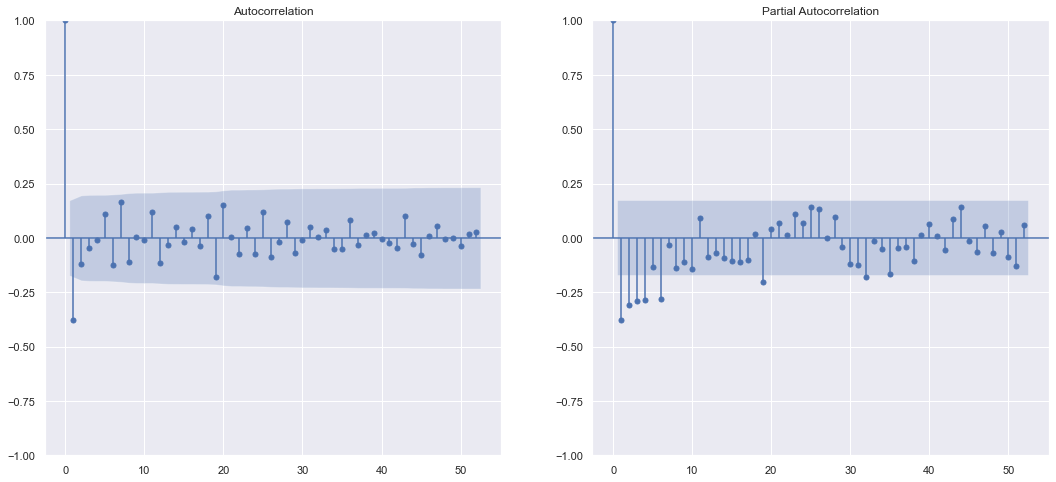

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))

plot_acf(df_ts_monthly_log_2,lags=52,ax=ax1)  ## was 36 in case on 1M
plot_pacf(df_ts_monthly_log_2,lags=52,ax=ax2) ## was 36 in case on 1M

plt.show();


In [22]:
model_sm = sm.tsa.SARIMAX(df_ts_monthly_log, order=(1,1,1), seasonal_order = (0,1,1,12))  ## 1M: seasonal_order = (0,1,1,12)
# df_ts_monthly_log is used , not diff !!!
# why we need D=1, since no second order diff.

model_sm_fitted = model_sm.fit()

model_sm_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  131
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 268.509
Date:                            Sun, 05 Mar 2023   AIC                           -529.018
Time:                                    17:59:36   BIC                           -517.935
Sample:                                03-22-2020   HQIC                          -524.518
                                     - 09-18-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1354      0.389      0.348      0.728      -0.627       0.898
ma.L1          0.0680      0.392      0.173      0.862      -0.701       0.837
ma.S.L12      -0.8927      0.155     -5.759      0.000      -1.197      -0.589
sigma2         0.0005   6.04e-05      8.774      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   1.15   Jarque-Bera (JB):                41.54
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               1.80   Skew:                            -0.92
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
# ma.L1 is not significant, so removed
model_sm = sm.tsa.SARIMAX(df_ts_monthly_log, order=(0,1,0), seasonal_order = (0,1,1,12)) # df_ts_monthly_log is used , not diff !!!
model_sm_fitted = model_sm.fit()

model_sm_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  131
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 266.100
Date:                              Sun, 05 Mar 2023   AIC                           -528.199
Time:                                      17:59:42   BIC                           -522.658
Sample:                                  03-22-2020   HQIC                          -525.949
                                       - 09-18-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.8005      0.098     -8.137      0.000      -0.993      -0.608
sigma2         0.0006    5.2e-05     11.159      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                39.36
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                            -0.93
Prob(H) (two-sided):                  0.06   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Ljung Box test is ok, but Jarque-Bera is not! -- TODO

(131,)


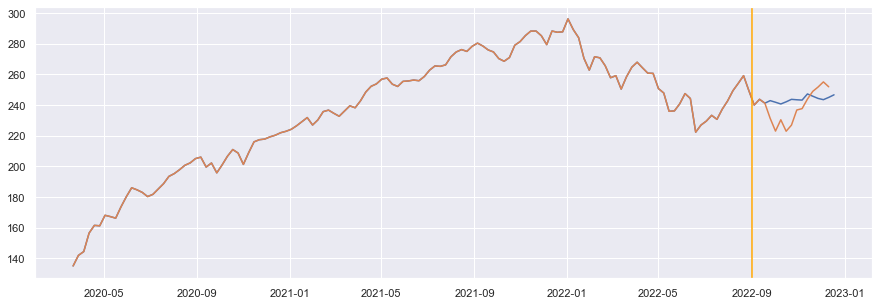

In [24]:
import datetime as dt

print(df_ts_monthly.shape)
prediction_log = model_sm_fitted.predict(131, 131+pred_period)
prediction=np.exp(prediction_log)

df_ts_monthly_pred=pd.concat([df_ts_monthly,prediction])

fig, ax = plt.subplots(figsize = (15,5))
plt.plot(df_ts_monthly_pred)
plt.plot(df_ts_monthly_save) # v 006

plt.axvline(x= dt.date(2022,9,1), color='orange'); 

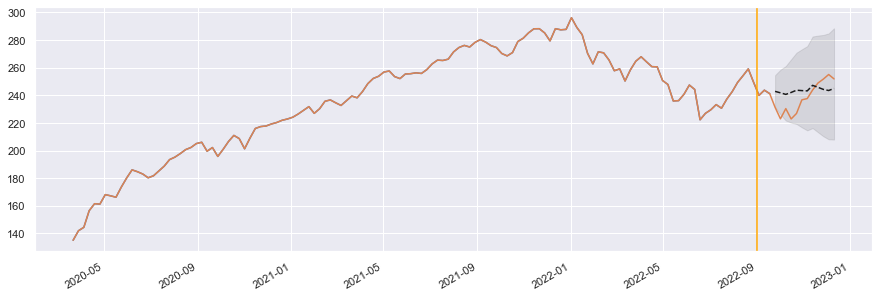

In [25]:
prediction_log = model_sm_fitted.get_forecast(steps =pred_period).summary_frame()  #PForecasting with a confidence interval
prediction=np.exp(prediction_log)

fig, ax = plt.subplots(figsize = (15,5))

plt.plot(df_ts_monthly)
plt.plot(df_ts_monthly_save) # v 006
#plt.ylim(0,300) # v006

prediction['mean'].plot(ax = ax, style = 'k--') # Plotting the mean

ax.fill_between(prediction.index, prediction['mean_ci_lower'], prediction['mean_ci_upper'], color='k', alpha=0.1); #Plotting the confidence interval

plt.axvline(x= dt.date(2022,9,1), color='orange'); 

In [26]:
validation_data=df_ts_monthly_save.tail(pred_period) # we know that 3y prediction

rmse_sm = np.sqrt(np.square(np.subtract(validation_data,prediction['mean'])).mean()) 
print("RMSE of SARIMA prediction is:", rmse_sm)

RMSE of SARIMA prediction is: 11.466417964626682


In [ ]:
###################### linear regression 

In [30]:
df_ts_monthly_lin.loc[:,0]

Date
2020-03-22    135.038813
2020-03-29    141.935830
2020-04-05    144.421070
2020-04-12    156.460264
2020-04-19    161.502104
                 ...    
2022-08-21    259.141921
2022-08-28    249.320839
2022-09-04    239.968526
2022-09-11    243.717272
2022-09-18    241.185799
Freq: W-SUN, Name: 0, Length: 131, dtype: float64

In [31]:
from sklearn.linear_model import LinearRegression

df_ts_monthly_lin=pd.DataFrame(df_ts_monthly,index=df_ts_monthly.index)
df_ts_monthly_lin['Time'] = np.arange(len(df_ts_monthly_lin.index))
X=df_ts_monthly_lin.loc[:, ['Time']] 
##y=df_ts_monthly_lin.loc[:, ['BLK']] 
y=df_ts_monthly_lin.loc[:, [0]] 

In [33]:
model_lin = LinearRegression()
model_lin.fit(X, y)



LinearRegression()

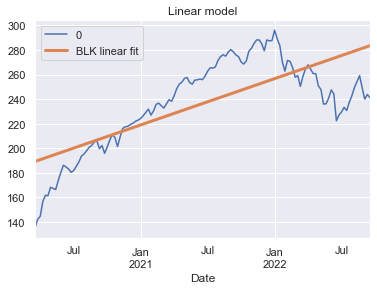

In [34]:
y_pred = pd.DataFrame(model_lin.predict(X), index=X.index, columns=['BLK linear fit'])

ax = y.plot()
ax = y_pred.plot(ax=ax, linewidth=3,legend="linear projection")
ax.set_title('Linear model');

In [37]:
#df_ts_monthly_lin['Lag_1'] = df_ts_monthly_lin['BLK'].shift(1)
df_ts_monthly_lin['Lag_1'] = df_ts_monthly_lin[[0]].shift(1)

df_ts_monthly_lin.head()

,0,Time,Lag_1
Date,,,
2020-03-22,135.038813,0,NaN
2020-03-29,141.935830,1,135.038813
2020-04-05,144.421070,2,141.935830
2020-04-12,156.460264,3,144.421070
2020-04-19,161.502104,4,156.460264


In [41]:
X = df_ts_monthly_lin.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
##y = df_ts_monthly_lin.loc[:, 'BLK']  # create the target
y = df_ts_monthly_lin.loc[:, 0]  # create the target

y, X = y.align(X, join='inner')  # drop corresponding values in target

model_lin = LinearRegression()
model_lin.fit(X, y)

##y_pred = pd.DataFrame(model_lin.predict(X), index=X.index, columns=['BLK lag'] )
y_pred = pd.DataFrame(model_lin.predict(X), index=X.index, columns=['lag'] )

y_pred

,lag
Date,
2020-03-29,139.742132
2020-04-05,146.374374
2020-04-12,148.764205
2020-04-19,160.341216
2020-04-26,165.189501
...,...
2022-08-21,254.257839
2022-08-28,259.080938
2022-09-04,249.636886


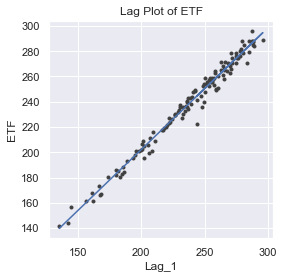

In [42]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
##ax.plot(X['Lag_1'], y_pred['BLK lag'])
ax.plot(X['Lag_1'], y_pred['lag'])


ax.set_aspect('equal')
##ax.set_ylabel('BLK')
ax.set_ylabel('ETF')
ax.set_xlabel('Lag_1')
##ax.set_title('Lag Plot of BLK');
ax.set_title('Lag Plot of ETF');

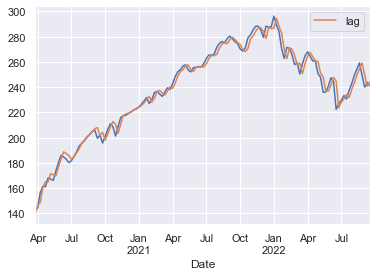

In [44]:
# check of fit - TODO ????

ax = y.plot()
ax = y_pred.plot(ax=ax)

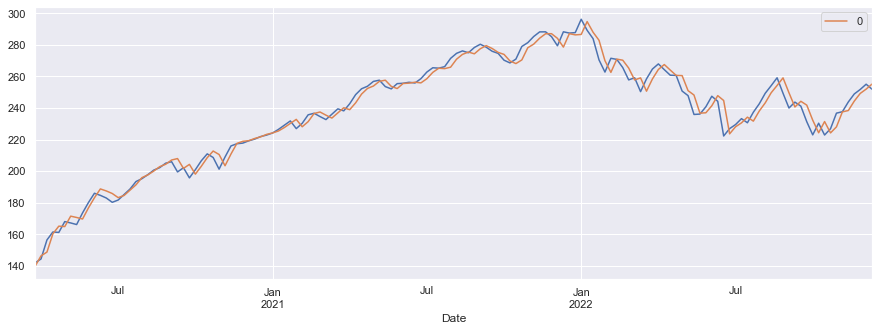

In [53]:
# future prediction based on save
df_ts_monthly_lin_save = pd.DataFrame(df_ts_monthly_save, index=df_ts_monthly_save.index)
df_ts_monthly_lin_save['Time'] = np.arange(len(df_ts_monthly_lin_save.index))

X_save = df_ts_monthly_lin_save.loc[:, ['Time']] 
##df_ts_monthly_lin_save['Lag_1'] = df_ts_monthly_lin_save['BLK'].shift(1)
df_ts_monthly_lin_save['Lag_1'] = df_ts_monthly_lin_save[0].shift(1)


X_save = df_ts_monthly_lin_save.loc[:, ['Lag_1']]
X_save.dropna(inplace=True)  
y_save = df_ts_monthly_lin_save.loc[:, 0]  
##y_save = df_ts_monthly_lin_save.loc[:, 'BLK']  

y_save, X_save = y_save.align(X_save, join='inner') 

# same as before without model fit!
##y_pred_save = pd.DataFrame(model_lin.predict(X_save), index=X_save.index, columns=['BLK lag'] )
y_pred_save = pd.DataFrame(model_lin.predict(X_save), index=X_save.index, columns=[0] )


fig, ax = plt.subplots(figsize = (15,5))

ax = y_save.plot()
ax = y_pred_save.plot(ax=ax)
plt.axvline(x= dt.date(2020,3,1), color='orange'); 

In [ ]:
df_ts_monthly_lin_save.tail()

In [ ]:
############### Prophet

In [54]:
import prophet as pt

In [55]:
df_ts_monthly_lin.head()

,0,Time,Lag_1
Date,,,
2020-03-22,135.038813,0,NaN
2020-03-29,141.935830,1,135.038813
2020-04-05,144.421070,2,141.935830
2020-04-12,156.460264,3,144.421070
2020-04-19,161.502104,4,156.460264


In [56]:
##df_ts_monthly_pt=df_ts_monthly_lin.rename(columns={'BLK': 'y'})
df_ts_monthly_pt=df_ts_monthly_lin.rename(columns={0: 'y'})

df_ts_monthly_pt['ds']=df_ts_monthly_pt.index
df_ts_monthly_pt=df_ts_monthly_pt.drop({'Lag_1','Time'},axis=1)
df_ts_monthly_pt.head()

,y,ds
Date,,
2020-03-22,135.038813,2020-03-22
2020-03-29,141.935830,2020-03-29
2020-04-05,144.421070,2020-04-05
2020-04-12,156.460264,2020-04-12
2020-04-19,161.502104,2020-04-19


In [57]:
model_pt = pt.Prophet(interval_width=0.95)
model_pt.fit(df_ts_monthly_pt)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [61]:
future_dates = model_pt.make_future_dataframe(periods=pred_period-5, freq='MS') # why we need 2? BLK: 2
future_dates.tail()

,ds
133,2022-12-01
134,2023-01-01
135,2023-02-01
136,2023-03-01
137,2023-04-01


In [62]:
forecast = model_pt.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-22,146.604343,136.626442,157.327548
1,2020-03-29,150.440846,139.689318,160.577522
2,2020-04-05,154.613764,144.033152,164.791334
3,2020-04-12,159.532560,148.629317,169.220378
4,2020-04-19,164.127593,153.731304,175.066810


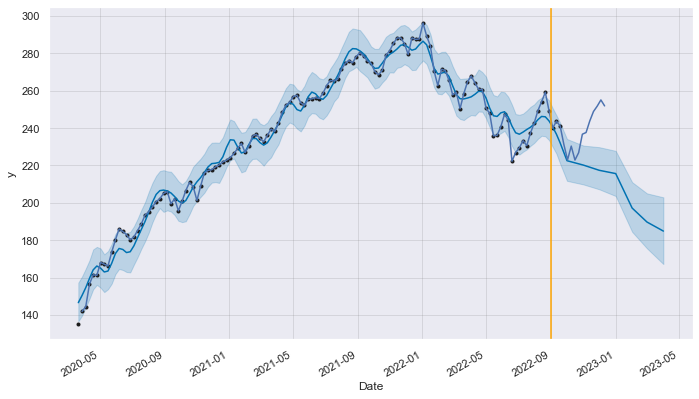

In [63]:
model_pt.plot(forecast, uncertainty=True)

ax = y_save.plot()
plt.axvline(x= dt.date(2022,9,1), color='orange'); 

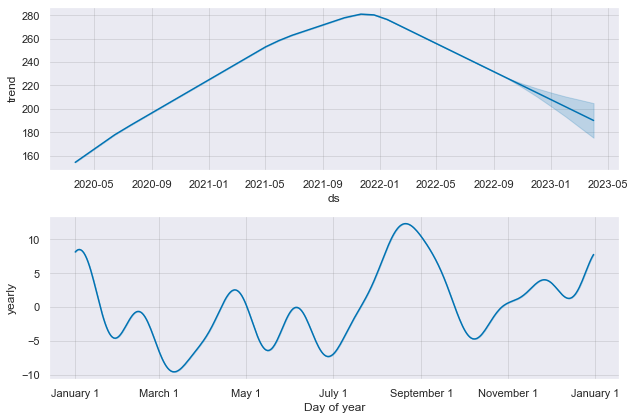

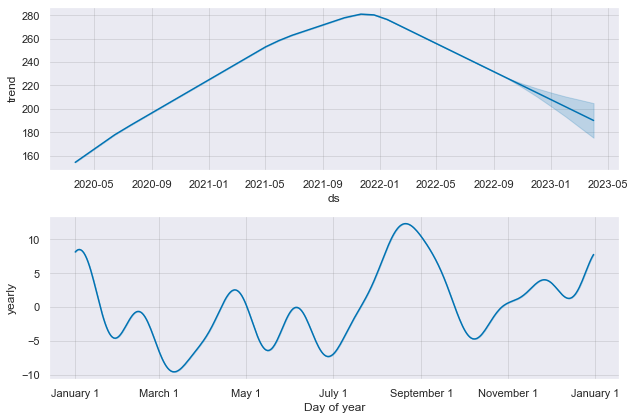

In [66]:
model_pt.plot_components(forecast)


In [67]:
rmse_pt = np.sqrt(np.square(np.subtract(validation_data,forecast.trend.tail(36))).mean()) 
print("RMSE of Prophet prediction is:", rmse_pt)
# TODO, indices are different

RMSE of Prophet prediction is: nan
